# 로지스틱 회귀 분석

## 이진 고객 이탈

고객의 웹사이트 광고를 제공하는 마케팅 대행사에서 당사의 고객이탈율이 꽤 높다는 사실을 알게됐습니다.<br>
그 회사에서는 즉시 고객 관리자들을 할당했지만, 어떤 고객이 이탈 할 것인지 예측하는 기계학습 모델을 만들어서 가장 이탈확률이 높은 고객에게 우선적으로 고객 관리자를 배치할 수 있기를 원합니다.<br>
고객이 잠재적 이탈 고객인지 여부를 분류하는 분류모델을 만드세요.

데이터는 customer_churn.csv로 저장돼있습니다. 아래는 각 컬럼의 정의입니다.
- Name : 회사의 최근 담당자의 이름
- Age : 고객의 나이
- Total_Purchase : 구매한 총 광고
- Account_Manager : 바이너리 0 = 고객 관리자 없음, 1 = 고객 관리자 할당됨
- Years : 거래 유지 연도수
- Num_sites : 서비스를 이용 중인 웹사이트 수
- Onboard_date : 마지막 연락처가 등록된 날짜
- Location : 고객 사무실 주소
- Company : 고객 회사의 이름

모델 생성 후에는 고객이 제공하는 new_customers.csv 파일에 저장된 새로운 데이터에 대한 예측값을 제시하세요. <br>
고객은 이 데이터를 통해 관리가 필요한 고객들을 알고 싶어 합니다.

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.special import expit, softmax
from datetime import datetime

plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [2]:
df = pd.read_csv("./data/customer_churn.csv")

In [3]:
df

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1
...,...,...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0


### 데이터 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


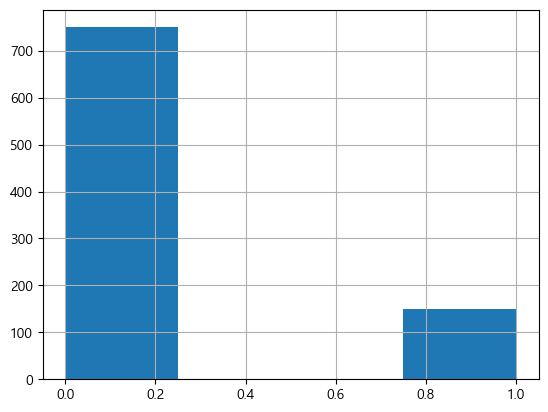

<Figure size 600x400 with 0 Axes>

In [6]:
df["Churn"].hist(bins = 4)
plt.figure(figsize=(6, 4))
plt.show()

In [7]:
sum(df["Churn"])

150

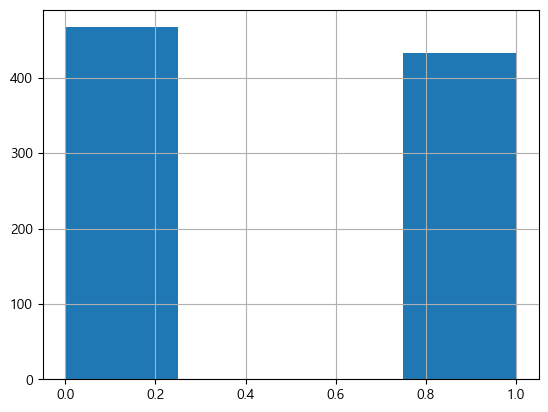

<Figure size 600x400 with 0 Axes>

In [8]:
df["Account_Manager"].hist(bins = 4)
plt.figure(figsize=(6, 4))
plt.show()

In [9]:
sum(df["Account_Manager"])

433

## 머신러닝용 데이터 전처리

In [10]:
df.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [11]:
df["Location"].nunique()

900

- df["Location"] 컬럼은 의미 없을 것으로 예상

In [12]:
df = df.drop("Location", axis = 1)

In [13]:
df

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,Love-Jones,1
...,...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,Robles-Abbott,0


In [14]:
df["Company"].nunique()

873

- df["Company"] 컬럼도 의미 없을 것으로 예상

In [15]:
df = df.drop("Company", axis = 1)

In [16]:
df

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,1
...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,0


- "Onboard_date" 컬럼이 object 타입이므로 처리가 필요할 것으로 보임

In [17]:
df["Onboard_date"] = df["Onboard_date"].astype(str)

In [18]:
df["Onboard_date"][0][:10]

'2013-08-30'

In [19]:
df["Onboard_date"].isna().sum()

0

In [20]:
df["date"] = df["Onboard_date"].apply(lambda x: x[0:10])

In [21]:
df["year"] = df["date"].apply(lambda x: x[0:4])

In [22]:
df["month"] = df["date"].apply(lambda x: x[5:7])

In [23]:
df["year"].unique().min()

'2006'

In [24]:
df["year"] = df["year"].astype(int)

In [25]:
df["month"] = df["month"].astype(int)

In [26]:
df["onboard"] = (df["year"]-2006) + df["month"] * 12

In [27]:
df["onboard"].nunique()

131

In [28]:
df["onboard"].isna().sum()

0

In [29]:
df["Num_Sites"]

0       8.0
1      11.0
2      12.0
3      10.0
4       9.0
       ... 
895     8.0
896     7.0
897     4.0
898    10.0
899    10.0
Name: Num_Sites, Length: 900, dtype: float64

In [30]:
df.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Churn', 'date', 'year', 'month',
       'onboard'],
      dtype='object')

In [31]:
df = df.drop(["Names", "Onboard_date", "date", "year", "month"], axis = 1)

In [32]:
df

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,onboard
0,42.0,11066.80,0,7.22,8.0,1,103
1,41.0,11916.22,0,6.50,11.0,1,103
2,38.0,12884.75,0,6.67,12.0,1,82
3,42.0,8010.76,0,6.71,10.0,1,56
4,37.0,9191.58,0,5.56,9.0,1,22
...,...,...,...,...,...,...,...
895,42.0,12800.82,1,3.62,8.0,0,145
896,52.0,9893.92,0,6.91,7.0,0,146
897,45.0,12056.18,0,5.46,4.0,0,80
898,51.0,6517.93,1,5.47,10.0,0,66


In [33]:
# 피처 각각에 대한 히스토그램을 출력
def plot_hist(df):
    plt.rcParams["figure.figsize"] = [20, 16]
    fig = plt.figure()
    
    # df의 열 개수만큼의 subplot을 출력
    for i in range(len(df.columns)):
        ax = fig.add_subplot(4, 2, i + 1)
        plt.hist(df[df.columns[i]], bins = 50)
        ax.set_title(df.columns[i])
        
    plt.tight_layout()
    plt.show()

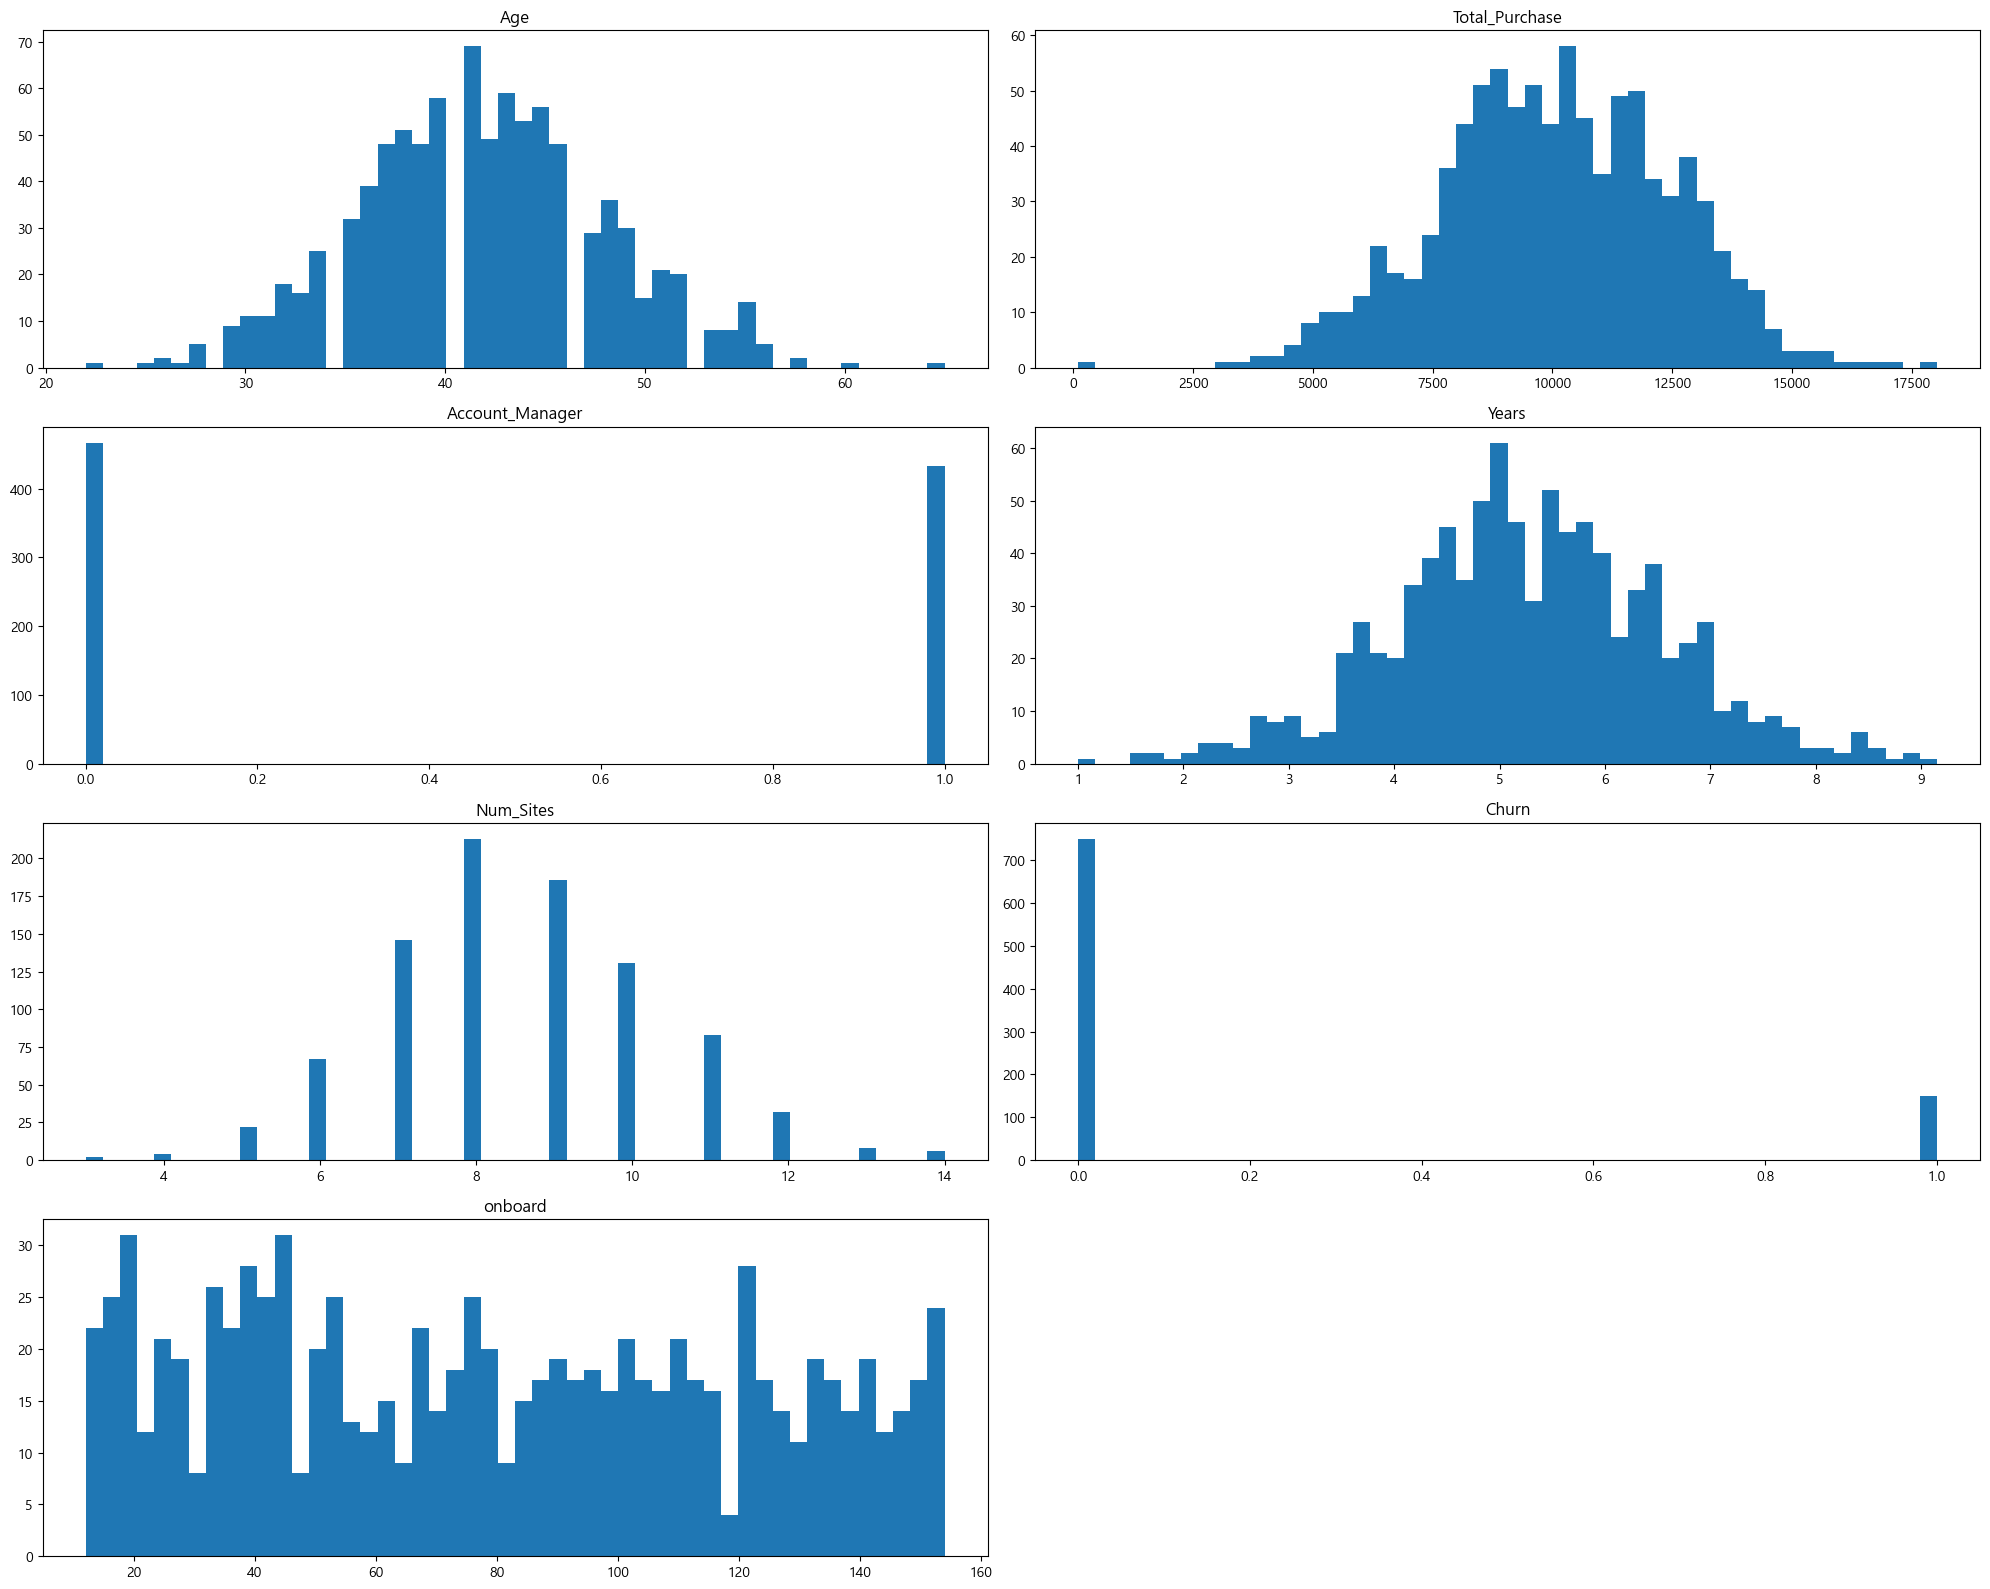

In [34]:
plot_hist(df)

In [35]:
df = df.sort_values(by="Total_Purchase", ascending = False).reset_index(drop = True)

In [36]:
x = df.drop("Churn", axis = 1)
y = df["Churn"]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 4)

In [38]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

### 머신러닝용 데이터 전처리

우리는 수치형 데이터만 이용할 예정입니다. Account_Manager는 다루기 어렵지 않기 때문에 모델학습에 포함할 수도 있겠지만 무작위로 할당된 것이기 때문에 큰 의미가 없을 수 있습니다.

In [39]:
df.loc[(df["Account_Manager"] == 0) & (df["Churn"] == 1)].count()

Age                66
Total_Purchase     66
Account_Manager    66
Years              66
Num_Sites          66
Churn              66
onboard            66
dtype: int64

In [40]:
df.loc[(df["Account_Manager"] == 0) & (df["Churn"] == 0)].count()

Age                401
Total_Purchase     401
Account_Manager    401
Years              401
Num_Sites          401
Churn              401
onboard            401
dtype: int64

In [41]:
df.loc[(df["Account_Manager"] == 1) & (df["Churn"] == 0)].count()

Age                349
Total_Purchase     349
Account_Manager    349
Years              349
Num_Sites          349
Churn              349
onboard            349
dtype: int64

In [42]:
df.loc[(df["Account_Manager"] == 1) & (df["Churn"] == 1)].count()

Age                84
Total_Purchase     84
Account_Manager    84
Years              84
Num_Sites          84
Churn              84
onboard            84
dtype: int64

- Account_Manager가 배정되지 않은 경우 이탈비율은 약 66/(401+66) = 14%
- Account_Manager가 배정된 경우 이탈비율은 약 84/(349+84) = 19% 
- 오히려 Account_Manager가 배정된 그룹의 이탈비율이 더 높은 것을 확인할 수 있음
- Account_Manager 배치 여부는 이탈과는 무관할 수도 있다고 생각됨

In [43]:
x = df.drop(["Churn", "Account_Manager"], axis = 1)
y = df["Churn"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 9)
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [44]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)

LogisticRegression()

In [45]:
logi.predict(scaled_test)

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [46]:
# 예측확률 출력
logi.predict_proba(scaled_test)[:5]

array([[0.86888141, 0.13111859],
       [0.98747016, 0.01252984],
       [0.6014516 , 0.3985484 ],
       [0.35501491, 0.64498509],
       [0.98940799, 0.01059201]])

In [47]:
# 종속변수 값 확인
logi.classes_

array([0, 1], dtype=int64)

In [48]:
# 로지스틱 회귀 회귀식 확인
logi.coef_, logi.intercept_

(array([[ 0.25069826,  0.1483206 ,  0.79079755,  1.86295275, -0.01924224]]),
 array([-2.64213556]))

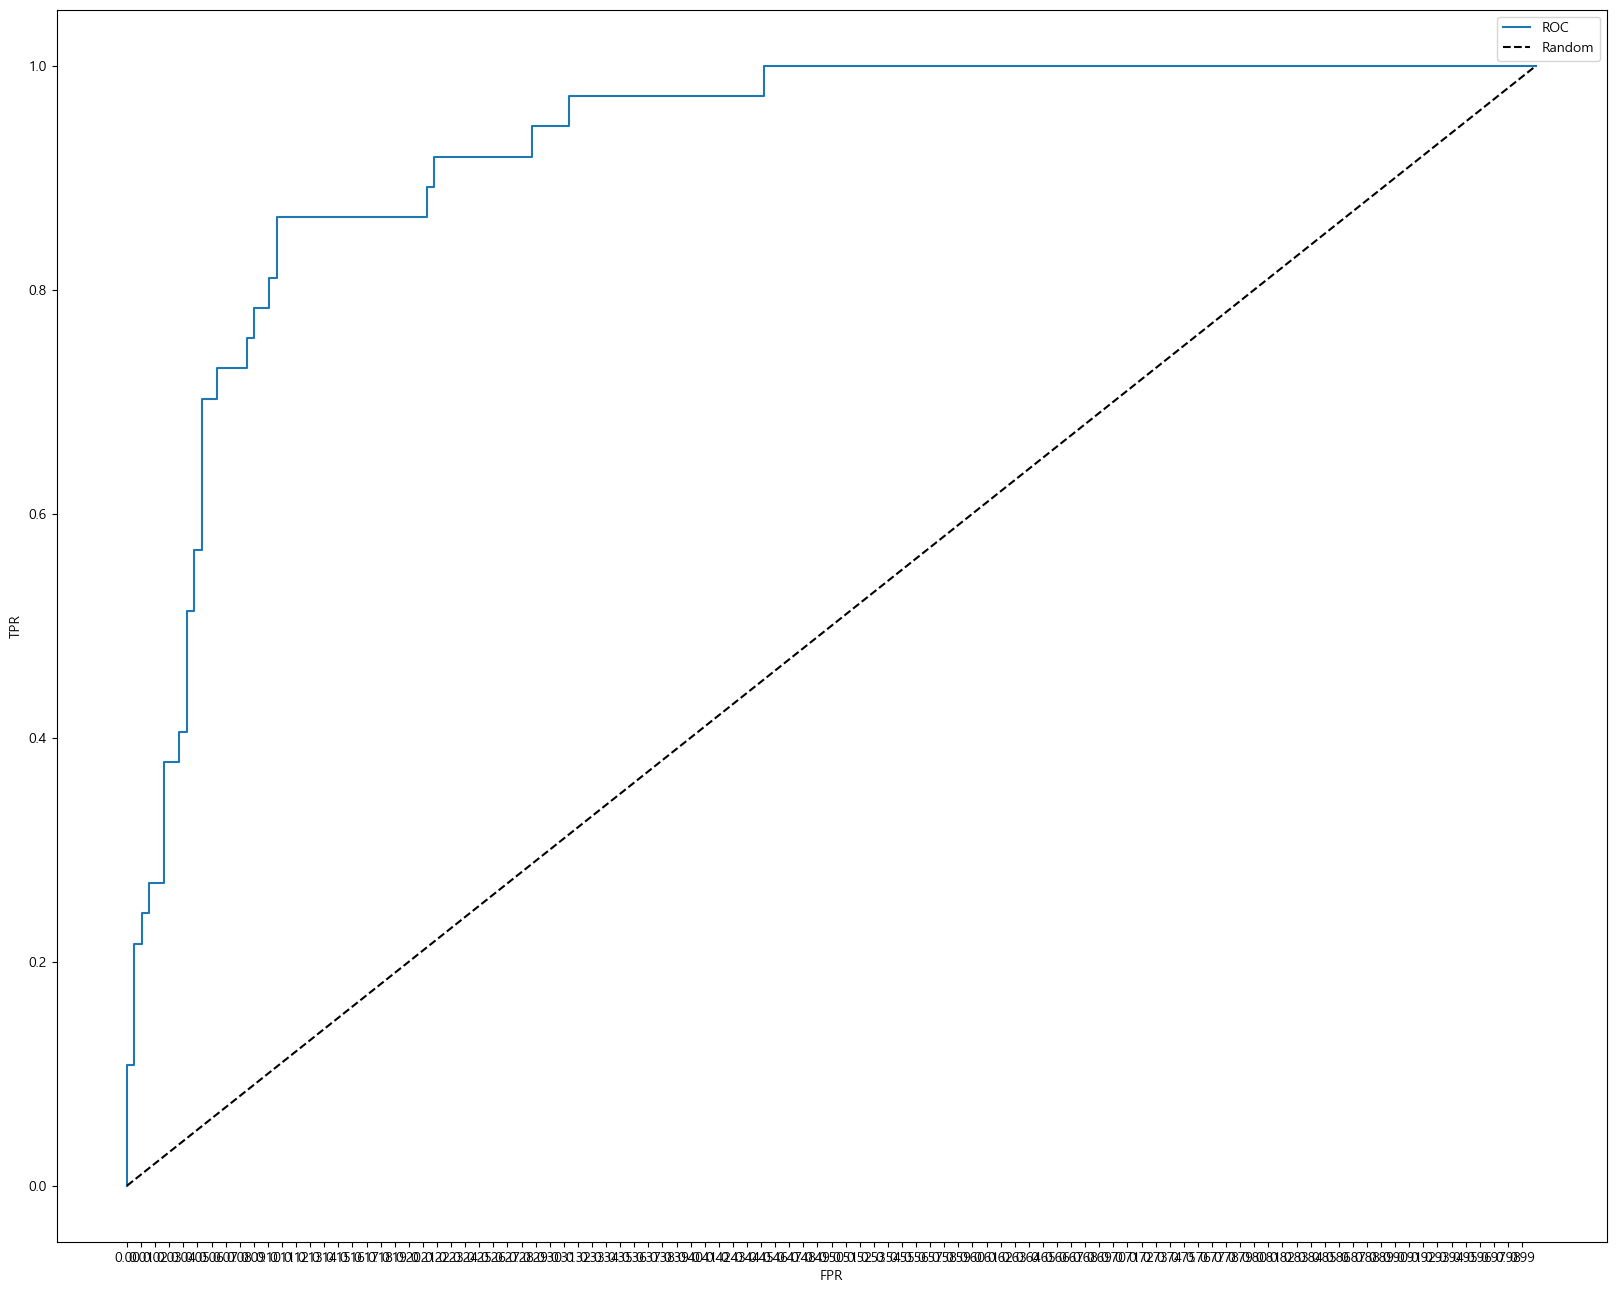

In [49]:
# roc 커브
pred_proba_class1 = logi.predict_proba(scaled_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.figure()
plt.plot(fprs, tprs, label = "ROC")
plt.plot([0,1], [0,1], "k--", label="Random")

plt.xticks(np.round(np.arange(0, 1, 0.01), 5))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

plt.show()

In [50]:
roc_auc_score(y_test, pred_proba_class1)

0.9253881541115584

In [51]:
guess = pd.read_csv("./data/new_customers.csv").reset_index()

In [52]:
guess

,index,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company
0,Andrew Mccall,37.0,9935.53,1,7.71,8.0,2011-08-29 18:37:54,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd,NaN
1,Michele Wright,23.0,7526.94,1,9.28,15.0,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson,NaN
2,Jeremy Chang,65.0,100.00,1,1.00,15.0,2006-12-11 07:48:13,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson,NaN
3,Megan Ferguson,32.0,6487.50,0,9.40,14.0,2016-10-28 05:32:13,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden,NaN
4,Taylor Young,32.0,13147.71,1,10.00,8.0,2012-03-20 00:36:46,Unit 0789 Box 0734 DPO AP 39702,Wood LLC,NaN
5,Jessica Drake,22.0,8445.26,1,3.46,14.0,2011-02-04 19:29:27,1148 Tina Stravenue Apt. 978 South Carlos TX 2...,Parks-Robbins,NaN


In [53]:
guess = guess.drop("Company", axis = 1)

In [54]:
guess.columns.nunique()

9

In [55]:
guess.columns = ['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites', 'Onboard_date', 'Location', 'Company']

In [56]:
guess

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company
0,Andrew Mccall,37.0,9935.53,1,7.71,8.0,2011-08-29 18:37:54,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd
1,Michele Wright,23.0,7526.94,1,9.28,15.0,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson
2,Jeremy Chang,65.0,100.00,1,1.00,15.0,2006-12-11 07:48:13,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson
3,Megan Ferguson,32.0,6487.50,0,9.40,14.0,2016-10-28 05:32:13,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden
4,Taylor Young,32.0,13147.71,1,10.00,8.0,2012-03-20 00:36:46,Unit 0789 Box 0734 DPO AP 39702,Wood LLC
5,Jessica Drake,22.0,8445.26,1,3.46,14.0,2011-02-04 19:29:27,1148 Tina Stravenue Apt. 978 South Carlos TX 2...,Parks-Robbins


In [57]:
guess["Onboard_date"] = guess["Onboard_date"].astype(str)
guess["date"] = guess["Onboard_date"].apply(lambda x: x[0:10])
guess["year"] = guess["date"].apply(lambda x: x[0:4])
guess["month"] = guess["date"].apply(lambda x: x[5:7])
guess["year"] = guess["year"].astype(int)
guess["month"] = guess["month"].astype(int)
guess["onboard"] = (guess["year"]-2006) + guess["month"] * 12

In [58]:
guess

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,date,year,month,onboard
0,Andrew Mccall,37.0,9935.53,1,7.71,8.0,2011-08-29 18:37:54,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd,2011-08-29,2011,8,101
1,Michele Wright,23.0,7526.94,1,9.28,15.0,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson,2013-07-22,2013,7,91
2,Jeremy Chang,65.0,100.00,1,1.00,15.0,2006-12-11 07:48:13,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson,2006-12-11,2006,12,144
3,Megan Ferguson,32.0,6487.50,0,9.40,14.0,2016-10-28 05:32:13,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden,2016-10-28,2016,10,130
4,Taylor Young,32.0,13147.71,1,10.00,8.0,2012-03-20 00:36:46,Unit 0789 Box 0734 DPO AP 39702,Wood LLC,2012-03-20,2012,3,42
5,Jessica Drake,22.0,8445.26,1,3.46,14.0,2011-02-04 19:29:27,1148 Tina Stravenue Apt. 978 South Carlos TX 2...,Parks-Robbins,2011-02-04,2011,2,29


In [59]:
guess

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,date,year,month,onboard
0,Andrew Mccall,37.0,9935.53,1,7.71,8.0,2011-08-29 18:37:54,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd,2011-08-29,2011,8,101
1,Michele Wright,23.0,7526.94,1,9.28,15.0,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson,2013-07-22,2013,7,91
2,Jeremy Chang,65.0,100.00,1,1.00,15.0,2006-12-11 07:48:13,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson,2006-12-11,2006,12,144
3,Megan Ferguson,32.0,6487.50,0,9.40,14.0,2016-10-28 05:32:13,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden,2016-10-28,2016,10,130
4,Taylor Young,32.0,13147.71,1,10.00,8.0,2012-03-20 00:36:46,Unit 0789 Box 0734 DPO AP 39702,Wood LLC,2012-03-20,2012,3,42
5,Jessica Drake,22.0,8445.26,1,3.46,14.0,2011-02-04 19:29:27,1148 Tina Stravenue Apt. 978 South Carlos TX 2...,Parks-Robbins,2011-02-04,2011,2,29


In [60]:
guess = guess.drop(["Names","Location", "Company", "Onboard_date","date", "year", "month", "Account_Manager"], axis = 1)

In [61]:
scaled_guess = ss.transform(guess)

In [62]:
logi.predict(scaled_guess)

array([0, 1, 1, 1, 0, 1], dtype=int64)